# Creating Publication-Quality Graphics with ggplot2

> This materials have been taken from the Software Carpentry: R Novice Lesson. You can find the original materials here: https://github.com/swcarpentry/r-novice-gapminder

**Objectives**

- To be able to use ggplot2 to generate publication quality graphics.

- To apply geometry, aesthetic, and statisics layers to a ggplot plot.

- To manipulate the aesthetics of a plot usng different colors, shapes, and lines.

- To improve data visualization through transforming scales and paneling by group.

- To save a plot created with ggplot to disk.

**Outline**

- Introduction to why data visualization?
- Introduction to the Grammar of Graphics
- Introduction to ggplot2

Plotting our data is one of the best ways to
quickly explore it and the various relationships
between variables.

There are three main plotting systems in R,
the [base plotting system][base], the [lattice][lattice]
package, and the [ggplot2][ggplot2] package.

[base]: http://www.statmethods.net/graphs/index.html
[lattice]: http://www.statmethods.net/advgraphs/trellis.html
[ggplot2]: http://www.statmethods.net/advgraphs/ggplot2.html

Today we'll be learning about the ggplot2 package, because
it is the most effective for creating publication quality
graphics.

ggplot2 is built on the grammar of graphics, the idea that any plot can be
expressed from the same set of components: a **data** set, a
**coordinate system**, and a set of **geoms**--the visual representation of data
points.

The key to understanding ggplot2 is thinking about a figure in layers.
This idea may be familiar to you if you have used image editing programs like Photoshop, Illustrator, or
Inkscape.

Let's start off with an example:

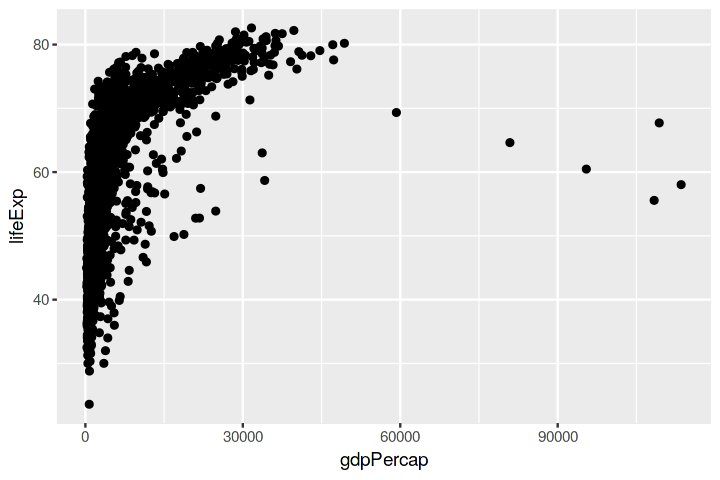

In [33]:
options(repr.plot.width = 6, repr.plot.height = 4)
library("ggplot2")
library("gapminder")

ggplot(data = gapminder, aes(x = gdpPercap, y = lifeExp)) +
  geom_point()

So the first thing we do is call the `ggplot` function. This function lets R
know that we're creating a new plot, and any of the arguments we give the
`ggplot` function are the *global* options for the plot: they apply to all
layers on the plot.

We've passed in two arguments to `ggplot`. First, we tell `ggplot` what data we
want to show on our figure, in this example the gapminder data we read in
earlier. For the second argument we passed in the `aes` function, which
tells `ggplot` how variables in the **data** map to *aesthetic* properties of
the figure, in this case the **x** and **y** locations. Here we told `ggplot` we
want to plot the "gdpPercap" column of the gapminder data frame on the x-axis, and
the "lifeExp" column on the y-axis. Notice that we didn't need to explicitly
pass `aes` these columns (e.g. `x = gapminder[, "gdpPercap"]`), this is because
`ggplot` is smart enough to know to look in the **data** for that column!

By itself, the call to `ggplot` isn't enough to draw a figure:

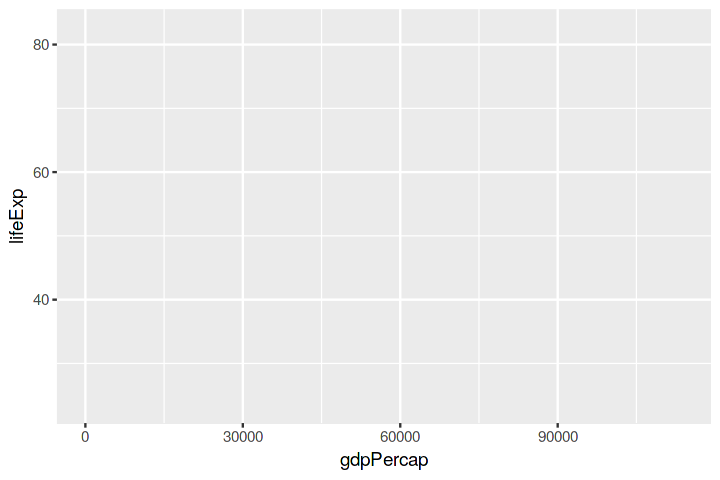

In [34]:
ggplot(data = gapminder, aes(x = gdpPercap, y = lifeExp))

We need to tell `ggplot` how we want to visually represent the data, which we do by adding a new **geom** layer. In our example, we used `geom_point`, which tells `ggplot` we want to visually represent the relationship between **x and y** as a scatterplot of points:

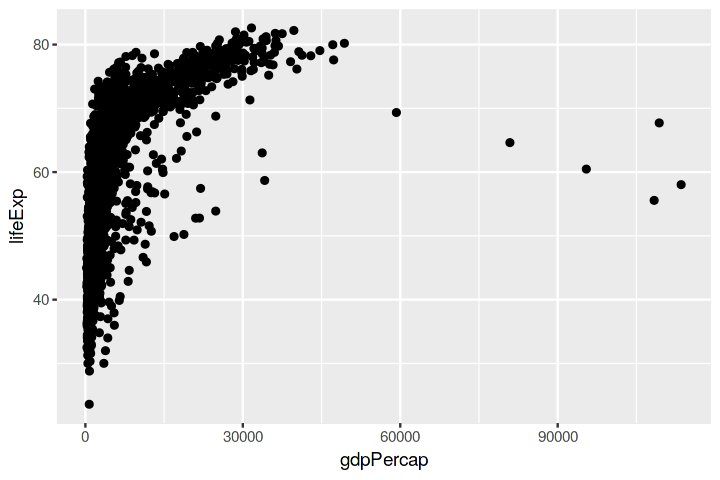

In [35]:
ggplot(data = gapminder, aes(x = gdpPercap, y = lifeExp)) +
  geom_point()

## Layers

Using a scatterplot probably isn't the best for visualizing change over time.
Instead, let's tell `ggplot` to visualize the data as a line plot:

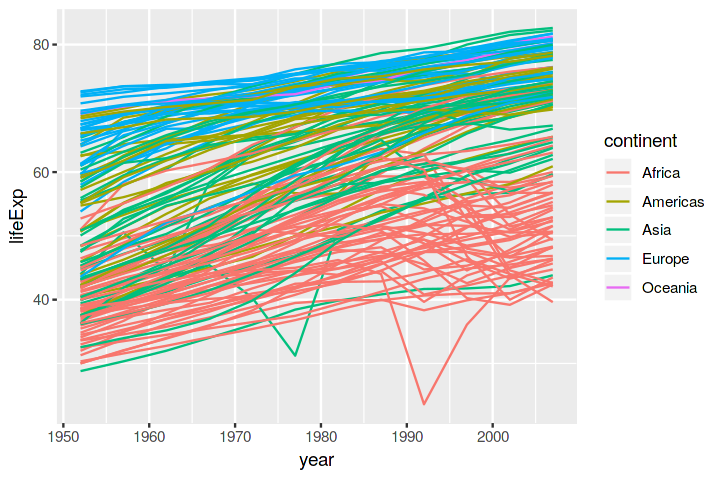

In [36]:
ggplot(data = gapminder, aes(x=year, y=lifeExp, by=country, color=continent)) +
  geom_line()

Instead of adding a `geom_point` layer, we've added a `geom_line` layer. We've
added the **by** *aesthetic*, which tells `ggplot` to draw a line for each
country.

But what if we want to visualize both lines and points on the plot? We can
simply add another layer to the plot:


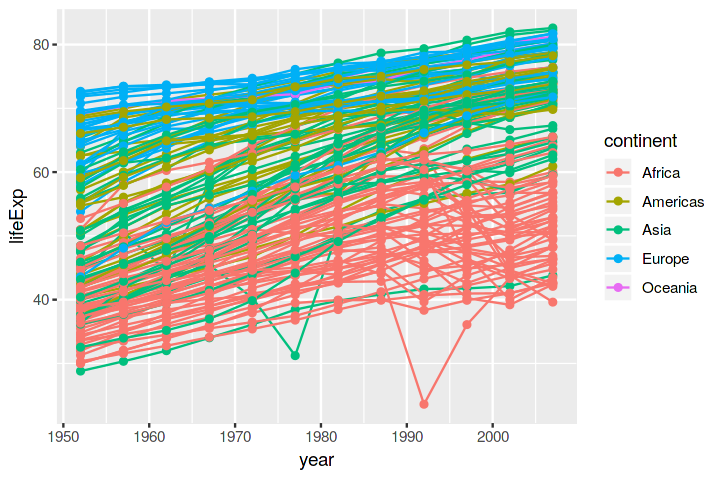

In [37]:
ggplot(data = gapminder, aes(x=year, y=lifeExp, by=country, color=continent)) +
  geom_line() + geom_point()

It's important to note that each layer is drawn on top of the previous layer. In
this example, the points have been drawn *on top of* the lines. Here's a
demonstration:

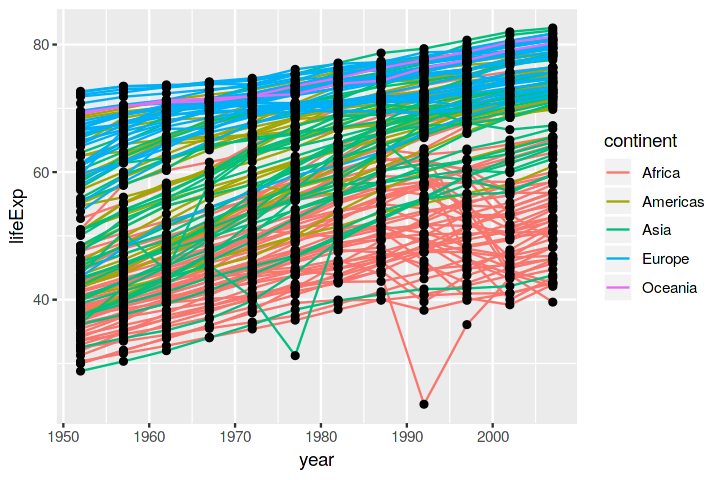

In [38]:
ggplot(data = gapminder, aes(x=year, y=lifeExp, by=country)) +
  geom_line(aes(color=continent)) + geom_point()

In this example, the *aesthetic* mapping of **color** has been moved from the
global plot options in `ggplot` to the `geom_line` layer so it no longer applies
to the points. Now we can clearly see that the points are drawn on top of the
lines.

## Transformations and statistics

ggplot2 also makes it easy to overlay statistical models over the data. To
demonstrate we'll go back to our first example:

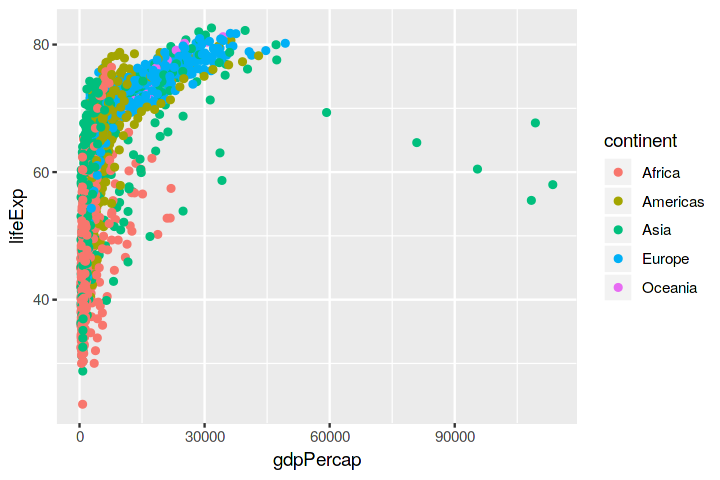

In [39]:
ggplot(data = gapminder, aes(x = gdpPercap, y = lifeExp, color=continent)) +
  geom_point()

Currently it's hard to see the relationship between the points due to some strong
outliers in GDP per capita. We can change the scale of units on the x axis using
the *scale* functions. These control the mapping between the data values and
visual values of an aesthetic. We can also modify the transparency of the
points, using the *alpha* function, which is especially helpful when you have
a large amount of data which is very clustered.

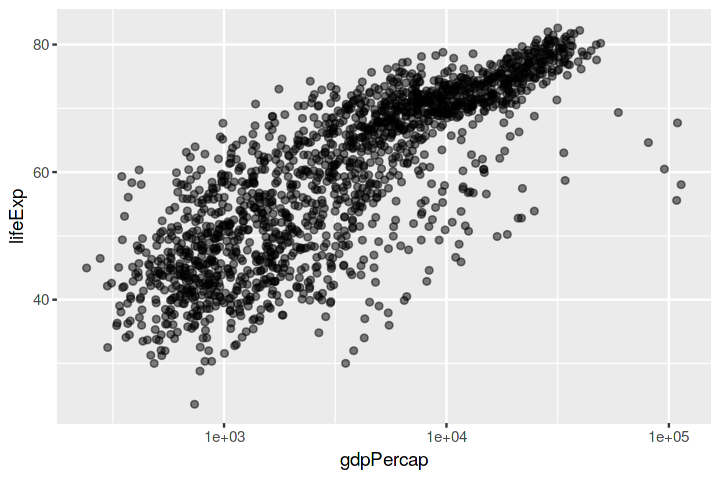

In [40]:
ggplot(data = gapminder, aes(x = gdpPercap, y = lifeExp)) +
  geom_point(alpha = 0.5) + scale_x_log10()

The `log10` function applied a transformation to the values of the gdpPercap
column before rendering them on the plot, so that each multiple of 10 now only
corresponds to an increase in 1 on the transformed scale, e.g. a GDP per capita
of 1,000 is now 3 on the y axis, a value of 10,000 corresponds to 4 on the y
axis and so on. This makes it easier to visualize the spread of data on the
x-axis.

We can fit a simple relationship to the data by adding another layer,
`geom_smooth`:

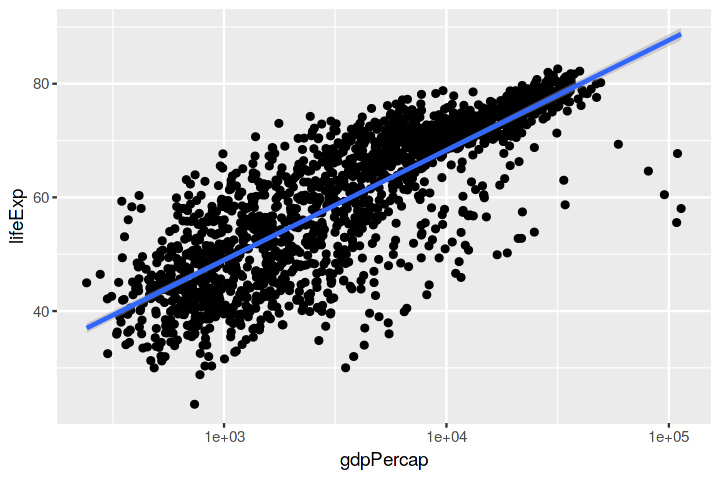

In [41]:
ggplot(data = gapminder, aes(x = gdpPercap, y = lifeExp)) +
  geom_point() + scale_x_log10() + geom_smooth(method="lm")

We can make the line thicker by *setting* the **size** aesthetic in the
`geom_smooth` layer:

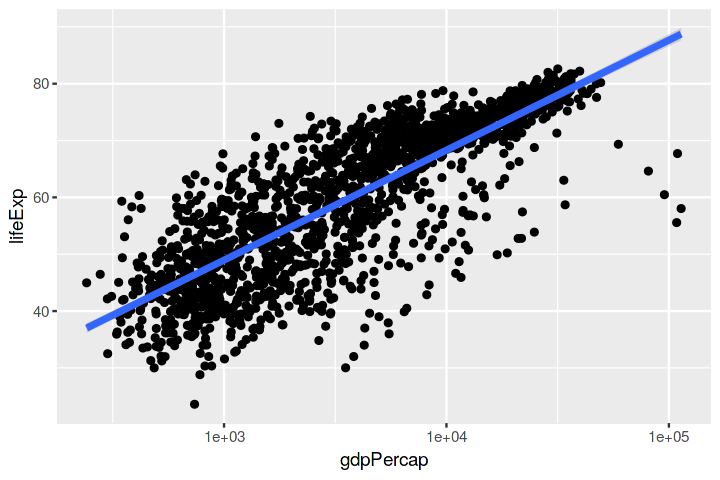

In [42]:
ggplot(data = gapminder, aes(x = gdpPercap, y = lifeExp)) +
  geom_point() + scale_x_log10() + geom_smooth(method="lm", size=1.5)

There are two ways an *aesthetic* can be specified. Here we *set* the **size**
aesthetic by passing it as an argument to `geom_smooth`. Previously in the
lesson we've used the `aes` function to define a *mapping* between data
variables and their visual representation.

## Multi-panel figures

Earlier we visualized the change in life expectancy over time across all
countries in one plot. Alternatively, we can split this out over multiple panels
by adding a layer of **facet** panels. Focusing only on those countries with
names that start with the letter "A" or "Z".

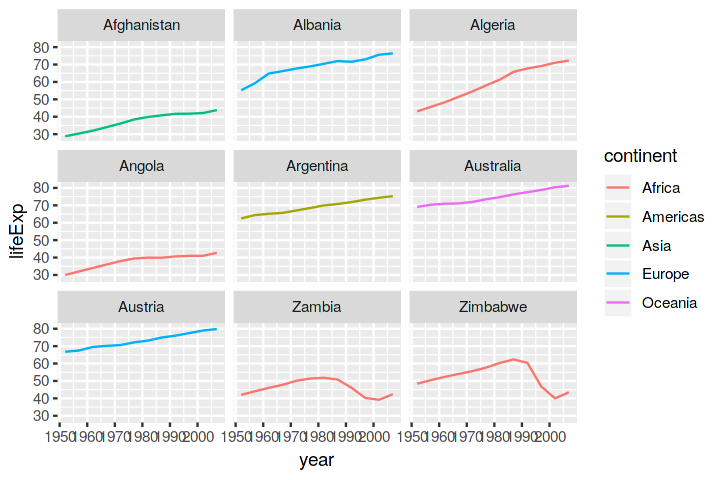

In [43]:
starts.with <- substr(gapminder$country, start = 1, stop = 1)
az.countries <- gapminder[starts.with %in% c("A", "Z"), ]
ggplot(data = az.countries, aes(x = year, y = lifeExp, color=continent)) +
  geom_line() + facet_wrap( ~ country)

The `facet_wrap` layer took a "formula" as its argument, denoted by the tilde
(~). This tells R to draw a panel for each unique value in the country column
of the gapminder dataset.


## Modifying text

To clean this figure up for a publication we need to change some of the text
elements. The x-axis is too cluttered, and the y axis should read
"Life expectancy", rather than the column name in the data frame.

We can do this by adding a couple of different layers. The **theme** layer
controls the axis text, and overall text size. Labels for the axes, plot 
title and any legend can be set using the `labs` function. Legend titles
are set using the same names we used in the `aes` specification. Thus below
the color legend title is set using `color = "Continent"`, while the title 
of a fill legend would be set using `fill = "MyTitle"`. 

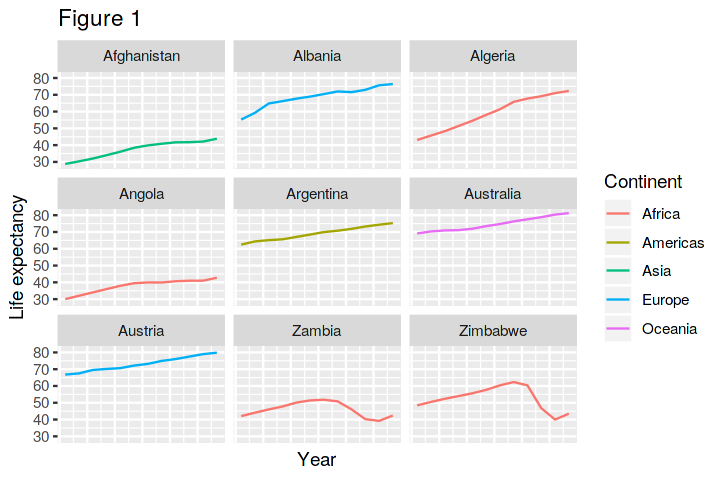

In [44]:
ggplot(data = az.countries, aes(x = year, y = lifeExp, color=continent)) +
  geom_line() + facet_wrap( ~ country) +
  labs(
    x = "Year",              # x axis title
    y = "Life expectancy",   # y axis title
    title = "Figure 1",      # main title of figure
    color = "Continent"      # title of legend
  ) +
  theme(axis.text.x=element_blank(), axis.ticks.x=element_blank())

## Exporting the plot

The `ggsave()` function allows you to export a plot created with ggplot. You can specify the dimension and resolution of your plot by adjusting the appropriate arguments (`width`, `height` and `dpi`) to create high quality graphics for publication. In order to save the plot from above, we first assign it to a variable `lifeExp_plot`, then tell `ggsave` to save that plot in `png` format to a directory called `results`. (Make sure you have a `results/` folder in your working directory.)


In [45]:
lifeExp_plot <- ggplot(data = az.countries, aes(x = year, y = lifeExp, color=continent)) +
  geom_line() + facet_wrap( ~ country) +
  labs(
    x = "Year",              # x axis title
    y = "Life expectancy",   # y axis title
    title = "Figure 1",      # main title of figure
    color = "Continent"      # title of legend
  ) +
  theme(axis.text.x=element_blank(), axis.ticks.x=element_blank())
ggsave(filename = "lifeExp.png", plot = lifeExp_plot, width = 12, height = 10, dpi = 300, units = "cm")

There are two nice things about `ggsave`. First, it defaults to the last plot, so if you omit the `plot` argument it will automatically save the last plot you created with `ggplot`. Secondly, it tries to determine the format you want to save your plot in from the file extension you provide for the filename (for example `.png` or `.pdf`). If you need to, you can specify the format explicitly in the `device` argument.

This is a taste of what you can do with ggplot2. RStudio provides a
really useful [cheat sheet][cheat] of the different layers available, and more
extensive documentation is available on the [ggplot2 website][ggplot-doc].
Finally, if you have no idea how to change something, a quick Google search will
usually send you to a relevant question and answer on Stack Overflow with reusable
code to modify!

[cheat]: http://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf
[ggplot-doc]: http://docs.ggplot2.org/current/